# Задание 3

Локальное выравнивание гистограммы на изображении в LAB на L компоненте

### Библиотеки

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Загрузка изображения и конвертация в LAB

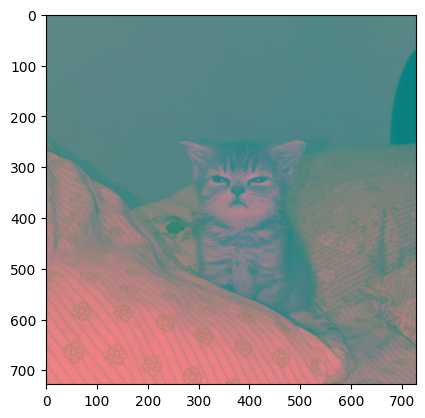

In [64]:
img = cv2.imread("pic.jpg")
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
plt.imshow(img_lab)

Построение диаграммы

- Cиний - L
- Зеленый - А
- Красный - B

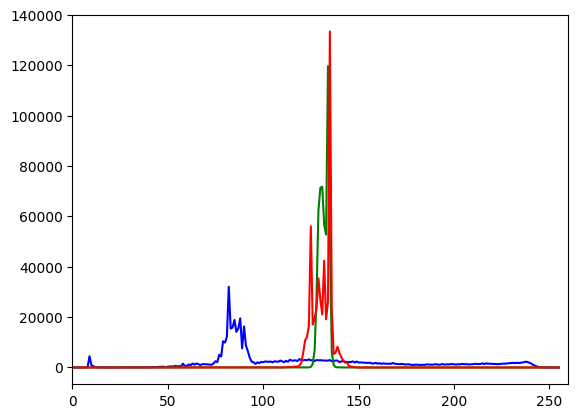

In [65]:
color = ("b", "g", "r")
for i, color in enumerate(color):
    hist = cv2.calcHist([img_lab], [i], None, [256], [0, 256], accumulate=False)
    plt.plot(hist, color = color)
    plt.xlim([0, 260])
plt.show()

Построение кумулятивной диаграммы


- Cиний - L
- Зеленый - А
- Красный - B

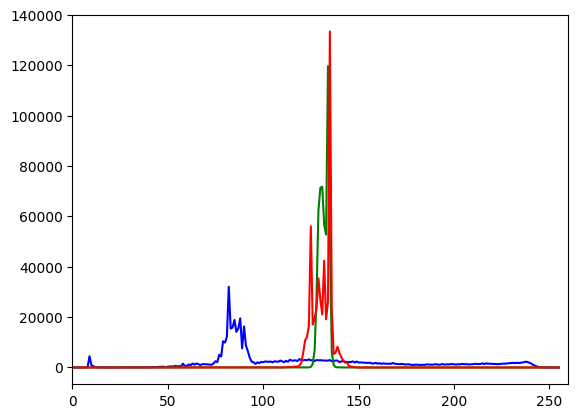

In [66]:
color = ("b", "g", "r")
for i, color in enumerate(color):
    hist = cv2.calcHist([img_lab], [i], None, [256], [0, 256], accumulate=True)
    plt.plot(hist, color = color)
    plt.xlim([0, 260])
plt.show()

Выравнивание гистограммы по L и конвертация в BGR

In [67]:
l, a, b = cv2.split(img_lab)
new_l = cv2.equalizeHist(l)

new_img_lab = cv2.merge((new_l, a, b))

new_img_bgr = cv2.cvtColor(new_img_lab, cv2.COLOR_LAB2BGR)

Диаграмма нового изображения


- Cиний - L
- Зеленый - А
- Красный - B

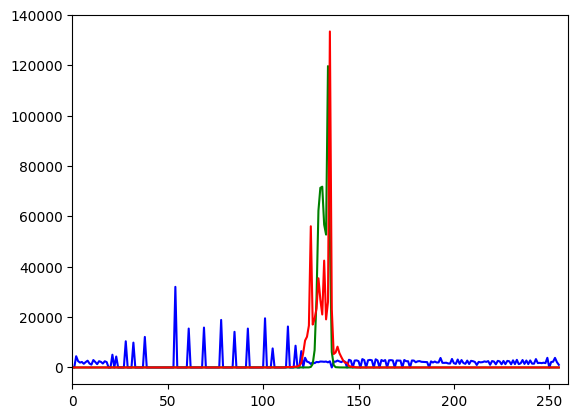

In [69]:
color = ("b", "g", "r")
for i, color in enumerate(color):
    hist = cv2.calcHist([new_img_lab], [i], None, [256], [0, 256], accumulate=False)
    plt.plot(hist, color = color)
    plt.xlim([0, 260])
plt.show()

Результат

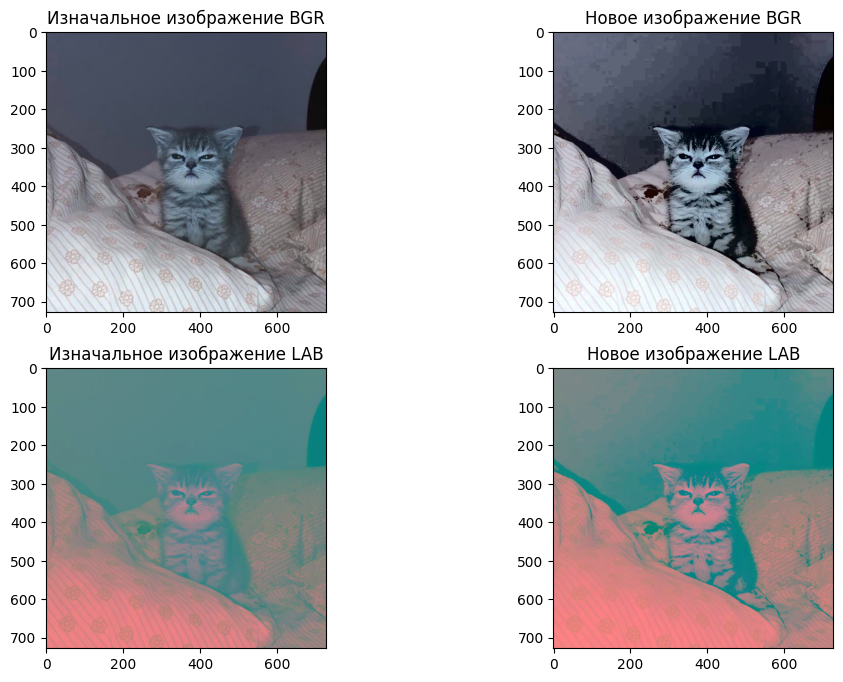

In [68]:
fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(img)
axes[0, 0].set_title('Изначальное изображение BGR')

axes[0, 1].imshow(new_img_bgr)
axes[0, 1].set_title('Новое изображение BGR')

axes[1, 0].imshow(img_lab)
axes[1, 0].set_title('Изначальное изображение LAB')

axes[1, 1].imshow(new_img_lab)
axes[1, 1].set_title('Новое изображение LAB')

fig.set_figwidth(12)
fig.set_figheight(8)

plt.show()

Изображение стало ярче